<a href="https://www.kaggle.com/code/dhanushnarayananr/ukraine-russia-2022-analysis?scriptVersionId=93790007" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2022-ukraine-russian-war/russia_losses_equipment.csv
/kaggle/input/2022-ukraine-russian-war/russia_losses_personnel.csv


In [2]:
df = pd.read_csv('/kaggle/input/2022-ukraine-russian-war/russia_losses_equipment.csv')
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN


In [3]:
df.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,38.000000,28.000000
mean,30.000000,105.596491,106.947368,518.771930,1518.719298,244.298246,82.719298,965.421053,68.385965,61.684211,5.000000,43.175439,21.473684,3.928571
std,16.598193,50.501365,41.331595,210.311675,439.124159,111.923916,34.745891,438.258972,7.603463,56.574590,2.345208,19.698733,5.573765,0.377964
min,2.000000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.000000,0.000000,10.000000,2.000000
25%,16.000000,57.000000,83.000000,353.000000,1165.000000,125.000000,58.000000,558.000000,60.000000,7.000000,3.000000,31.000000,18.250000,4.000000
50%,30.000000,115.000000,125.000000,561.000000,1625.000000,291.000000,90.000000,1089.000000,72.000000,53.000000,5.000000,49.000000,24.500000,4.000000
75%,44.000000,150.000000,135.000000,700.000000,1891.000000,333.000000,108.000000,1361.000000,76.000000,112.000000,7.000000,55.000000,25.000000,4.000000
max,58.000000,176.000000,153.000000,838.000000,2162.000000,397.000000,138.000000,1523.000000,76.000000,172.000000,8.000000,69.000000,27.000000,4.000000


Total Military Equipments of Russia : Took from https://armedforces.eu/

Aircraft : 5552
helicopter : 1724
tank : 12270

Artillery : 18497
APC : 26831

MRL : 4359
NAVAL SHIP : 664
Special Equip : 1070
Drones: 2000


In [4]:
df.isna().sum()

date                      0
day                       0
aircraft                  0
helicopter                0
tank                      0
APC                       0
field artillery           0
MRL                       0
military auto             0
fuel tank                 0
drone                     0
naval ship                0
anti-aircraft warfare     0
special equipment        19
mobile SRBM system       29
dtype: int64

In [5]:
df.fillna(0, inplace=True)
df['special equipment']= df['special equipment'].astype(int)
df['mobile SRBM system']= df['mobile SRBM system'].astype(int)

In [6]:
df.isna().sum()

date                     0
day                      0
aircraft                 0
helicopter               0
tank                     0
APC                      0
field artillery          0
MRL                      0
military auto            0
fuel tank                0
drone                    0
naval ship               0
anti-aircraft warfare    0
special equipment        0
mobile SRBM system       0
dtype: int64

In [7]:
needed_list=["aircraft","helicopter","tank","APC","field artillery","MRL","military auto","fuel tank","drone","naval ship","anti-aircraft warfare","special equipment","mobile SRBM system"]
for (columnName, columnData)  in df.iteritems():
    if columnName in needed_list:
        i=0
        new_list=[]
        new_list.append(columnData[0])
        while i<len(columnData)-1:
            n=columnData[i+1]- columnData[i]
            new_list.append(n)
            i=i+1
        print(new_list)
        
        # Drop that column
        df.drop(columnName, axis = 1, inplace = True)

        # Put whatever series you want in its place
        df[columnName] = new_list

[10, 17, 0, 2, 0, 1, 0, 3, 6, 5, 2, 2, 1, 0, 8, 1, 16, 3, 4, 3, 2, 7, 2, 1, 1, 2, 2, 7, 7, 2, 4, 2, 4, 4, 4, 8, 0, 0, 4, 3, 0, 0, 0, 1, 1, 2, 3, 1, 2, 3, 0, 2, 2, 2, 2, 1, 4]
[7, 19, 0, 3, 0, 2, 0, 6, 3, 8, 20, 12, 1, 0, 2, 0, 3, 4, 5, 13, 0, 4, 3, 3, 3, 2, 1, 0, 1, 2, 0, 0, 2, 2, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1, 1, 0, 3, 3, 1, 0, 1, 1, 1, 3, 0, 1, 2]
[80, 66, 4, 0, 48, 13, 6, 34, 18, 16, 5, 13, 14, 18, 18, 9, 12, 15, 15, 26, 14, 6, 16, 10, 22, 11, 8, 13, 31, 14, 7, 4, 11, 8, 9, 11, 6, 13, 3, 29, 8, 14, 2, 5, 17, 3, 7, 7, 14, 3, 6, 11, 17, 12, 13, 14, 9]
[516, 190, 0, 110, 30, 16, 38, 39, 6, 40, 14, 37, 34, 35, 60, 40, 21, 23, 30, 96, 60, 13, 22, 17, 48, 21, 22, 19, 28, 15, 24, 30, 16, 13, 12, 16, 25, 54, 14, 14, 3, 30, 0, 4, 16, 12, 23, 18, 4, 8, 6, 20, 39, 22, 24, 31, 44]
[49, 0, 1, 24, 3, 8, 5, 15, 0, 4, 8, 3, 0, 3, 2, 10, 5, 10, 0, 40, 11, 4, 8, 17, 10, 12, 15, 13, 11, 2, 1, 8, 1, 2, 6, 5, 1, 8, 5, 2, 0, 0, 1, 2, 7, 5, 2, 9, 8, 0, 5, 5, 5, 5, 5, 2, 4]
[4, 0, 0, 17, 3, 16, 2, 8, 0, 0, 

In [8]:
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,0,0
1,2022-02-26,3,17,19,66,190,0,0,30,0,2,0,0,0,0
2,2022-02-27,4,0,0,4,0,1,0,0,0,0,0,0,0,0
3,2022-02-28,5,2,3,0,110,24,17,161,0,1,0,5,0,0
4,2022-03-01,6,0,0,48,30,3,3,14,0,0,0,2,0,0


<AxesSubplot:>

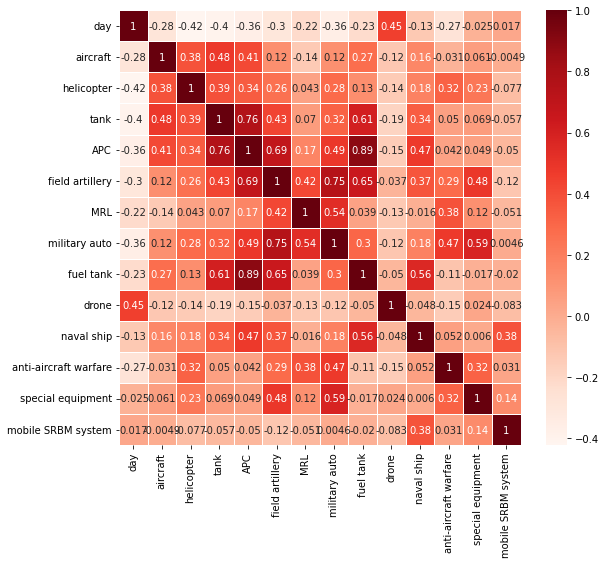

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_mat = df.corr() 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(correlation_mat,ax=ax, annot=True, cmap = 'Reds',linewidths=0.5)

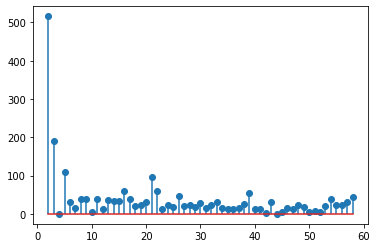

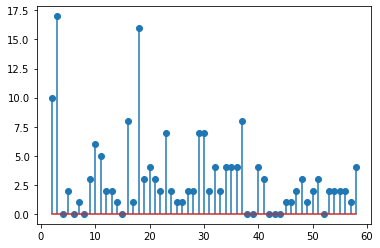

In [10]:
plt.stem(df.day,df.APC)
plt.show()

plt.stem(df.day,df.aircraft)
plt.show()

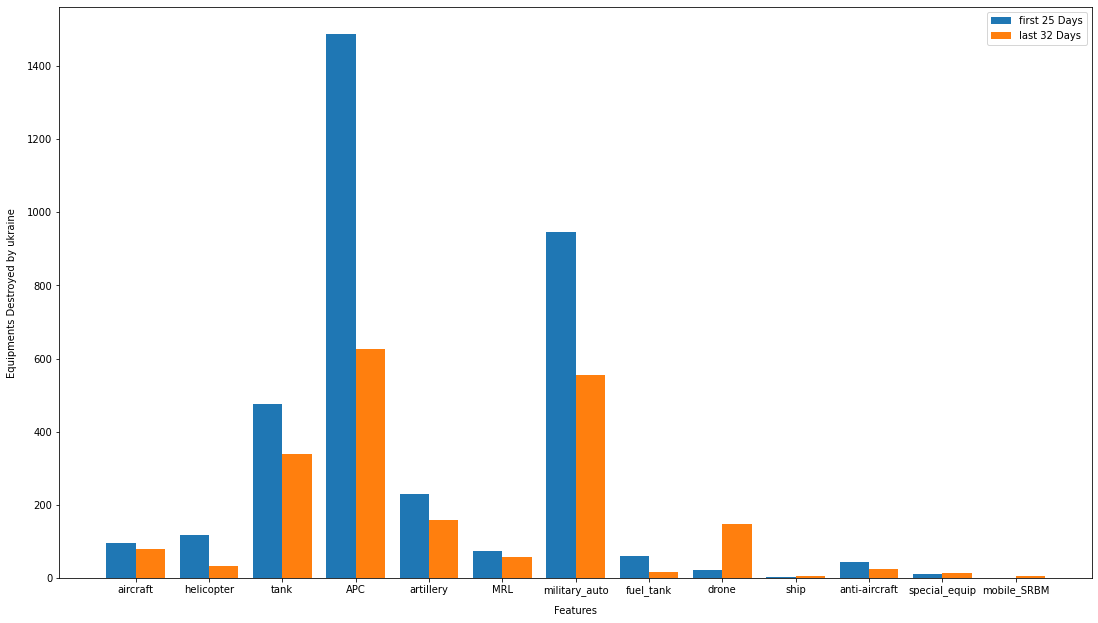

In [11]:
#test for bar

#plt.barh(df.day[24],df.aircraft[:24].cumsum())
#plt.show()

bar1_main=[]
bar2_main=[]
for (columnName, columnData)  in df.iteritems():
    X_axis = np.arange(len(needed_list))
    if columnName in needed_list:
        bar1=columnData[:24].sum()
        bar2=columnData[25:].sum()
        bar1_main.append(bar1)
        bar2_main.append(bar2)
        
plt.bar(X_axis - 0.2, bar1_main , 0.4, label = 'first 25 Days')
plt.bar(X_axis + 0.2, bar2_main , 0.4, label = 'last 32 Days')
plot_name=["aircraft","helicopter","tank","APC","artillery","MRL","military_auto","fuel_tank","drone","ship","anti-aircraft","special_equip","mobile_SRBM"]
plt.xticks(X_axis, plot_name)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.legend()
plt.xlabel("Features",labelpad=10)
plt.ylabel("Equipments Destroyed by ukraine",labelpad=10)
plt.show()